<a href="https://colab.research.google.com/github/avk4714/DL_Projects/blob/master/Deep%20Ensembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Ensembles


## B. Lakshminarayanan, A. Pritzel, C. Blundell - Simple and Scalable Predictive Uncertainty Estimation using Deep Ensembles

https://papers.nips.cc/paper/7219-simple-and-scalable-predictive-uncertainty-estimation-using-deep-ensembles.pdfLink: 

### Abstract
Deep neural networks (NNs) are powerful black box predictors that have recently achieved impressive performance on a wide spectrum of tasks. Quantifying predictive uncertainty in NNs is a challenging and yet unsolved problem. Bayesian NNs, which learn a distribution over weights, are currently the state-of-the-art for estimating predictive uncertainty; however these require significant modifications to the training procedure and are computationally expensive compared to standard (non-Bayesian) NNs. We propose an alternative to Bayesian NNs that is simple to implement, readily parallelizable, requires very little hyperparameter tuning, and yields high quality predictive uncertainty estimates. Through a series of experiments on classification and regression benchmarks, we demonstrate that our method produces well-calibrated uncertainty estimates which are as good or better than approximate Bayesian NNs. To assess robustness to dataset shift, we evaluate the predictive uncertainty on test examples from known and unknown distributions, and show that our method is able to express higher uncertainty on out-of-distribution examples. We demonstrate the scalability of our method by evaluating predictive uncertainty estimates on ImageNet.

Quantifying predictive uncertainty in neural networks is a challenging (unsolved) problem. Bayesian neural networks have a distribution over weights and are hard to train. Standard neural networks tend to be overconfident.

Data set $\mathcal{D} = \{\mathbf{x}_n,y_n\}_{n=1}^N$, where $\mathbf{x}\in \mathbb{R}^D$ is the feature vector.

The goal is to model a distribution $q(y|\mathbf{x})$ using the model $p_{\theta}(y|\mathbf{x})$, where $\theta$ are the parameters of the model.

Instead of using just one model, an ensemble of $M$ models is used to form a mixture model with the parameter set $\{\theta_m\}_{m=1}^M$. 

\begin{equation}
p(y|\mathbf{x})= \frac{1}{M}\sum_{m=1}^Mp_{\theta_m}(y|\mathbf{x})
\end{equation}

### Scoring rule

To train the model, a measure for the quality of predictive uncertainty is needed. This measure is called a scoring rule $S$, where higher is better:

\begin{equation}
S: p_{\theta},(\mathbf{x},y) \mapsto \mathbb{R}
\end{equation}

It evaluates the quality relative to an event $y|\mathbf{x} \sim q(y|\mathbf{x})$.

### Expected scoring rule

The expected scoring rule 
\begin{align}
\mathbb{E}_{q(y|\mathbf{x})}\{S(p_{\theta},(\mathbf{x},y))\} =\int q(y|\mathbf{x})S(p_{\theta},(\mathbf{x},y)\mathrm{d}y\mathrm{d}\mathbf{x}= S_E(q,p_\theta)
\end{align}

An expected scoring rule $S_E$ is proper if $S_E(q,p_\theta) \leq S_E(q,q)$.

A loss function $L$ is defined as:
\begin{equation}
L(\theta) = -S_E(q,p_\theta)
\end{equation}

Question: Is the log-likelihood $\log p_\theta(y|\mathbf{x})$ a proper scoring rule?

We need to prove $S_E(q,p_\theta) \leq S_E(q,q)$.

\begin{align}
\int q(y|\mathbf{x})S(p_{\theta},(\mathbf{x},y))\mathrm{d}y\mathrm{d}\mathbf{x}&=\int q(y|\mathbf{x})\log p_\theta(y|\mathbf{x})\mathrm{d}y\mathrm{d}\mathbf{x} \\
& = \mathbb{E}_q\{\log p_\theta\} \leq \mathbb{E}_q\{\log q\}, \mathrm{q.e.d}.
\end{align}

The prove uses Gibb's inequality: https://en.wikipedia.org/wiki/Gibbs%27_inequality

A negative log-likelihood (NLL) is used as the loss function for regression:

\begin{equation}
L(\theta)= -log p_\theta(y|\mathbf{x})
\end{equation}

### Gaussian Approximation

To model the true distribution $q$, the model $p$ is assumed to be gaussian. This way, it can be defined by mean and variance functions:

\begin{equation}
p(y|\mathbf{x}) \approx \mathcal{N}(\mu(\mathbf{x}),\sigma^2(\mathbf{x}))=\frac{1}{\sqrt{2\pi\sigma^2(\mathbf{x})}}\exp\left(-\frac{(y-\mu(\mathbf{x}))^2}{2\sigma^2(\mathbf{x})}\right)
\end{equation}

The ensemble model is a gaussian mixture model:

\begin{equation}
\mathcal{N}(\mu(\mathbf{x}),\sigma^2(\mathbf{x}))=\frac{1}{M}\sum_{m=1}^M\mathcal{N}(\mu_m(\mathbf{x}),\sigma_m^2(\mathbf{x}))
\end{equation}

The individual model is a feed-forward neural network which has two outputs $\mu_m(\mathbf{x})$ and $\sigma_m(\mathbf{x})$.

The mean and variance functions of $p$ are defined as:
\begin{align}
\mu(\mathbf{x}) &= \frac{1}{M}\sum_{m=1}^M \mu_m(\mathbf{x}), \\
\sigma^2(\mathbf{x}) &= \frac{1}{M}\sum_{m=1}^M \left(\sigma_m^2(\mathbf{x}) + \mu_m^2(\mathbf{x})\right)- \mu^2(\mathbf{x}).
\end{align}
As shown in https://stats.stackexchange.com/questions/16608/what-is-the-variance-of-the-weighted-mixture-of-two-gaussians

With the assumption of a gaussian approximation, the NLL can be derived:

\begin{align}
L(\theta)=-\log p_\theta(y|\mathbf{x})&=-\log\left(\frac{1}{\sqrt{2\pi\sigma_m^2(\mathbf{x})}}\exp\left(-\frac{(y-\mu_m(\mathbf{x}))^2}{2\sigma_m^2(\mathbf{x})}\right)\right) \\
&= \log\left(\sqrt{2\pi\sigma_m^2(\mathbf{x})}\right) + \frac{(y-\mu_m(\mathbf{x}))^2}{2\sigma_m^2(\mathbf{x})}\\
&= \frac{1}{2}\log\left(2\pi\sigma_m^2(\mathbf{x})\right) + \frac{(y-\mu_m(\mathbf{x}))^2}{2\sigma_m^2(\mathbf{x})}\\
 &=\frac{1}{2}\log\left(\sigma_m^2(\mathbf{x})\right) + \frac{(y-\mu_m(\mathbf{x}))^2}{2\sigma_m^2(\mathbf{x})} + \underbrace{\frac{1}{2}\log\left(2\pi\right)}_{\mathrm{=const.}}
\end{align}

### Coding examples

In [0]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
plt.rc('font', size=12)

In [0]:
class MLP(nn.Module):
    """ Multilayer perceptron (MLP) with tanh/sigmoid activation functions implemented in PyTorch for regression tasks.

    Attributes:
        inputs (int): inputs of the network
        outputs (int): outputs of the network
        hidden_layers (list): layer structure of MLP: [5, 5] (2 hidden layer with 5 neurons)
        activation (string): activation function used ('relu', 'tanh' or 'sigmoid')

    """

    def __init__(self, inputs=1, outputs=1, hidden_layers=[100], activation='relu'):
        super(MLP, self).__init__()
        self.inputs = inputs
        self.outputs = outputs
        self.hidden_layers = hidden_layers
        self.nLayers = len(hidden_layers)
        self.net_structure = [inputs, *hidden_layers, outputs]
        
        if activation == 'relu':
            self.act = torch.relu
        elif activation == 'tanh':
            self.act = torch.tanh
        elif activation == 'sigmoid':
            self.act = torch.sigmoid
        else:
            assert('Use "relu","tanh" or "sigmoid" as activation.')
        # create linear layers y = Wx + b

        for i in range(self.nLayers + 1):
            setattr(self, 'layer_'+str(i), nn.Linear(self.net_structure[i], self.net_structure[i+1]))

    def forward(self, x):
        # connect layers
        for i in range(self.nLayers):
            layer = getattr(self, 'layer_'+str(i))
            x = self.act(layer(x))
        layer = getattr(self, 'layer_' + str(self.nLayers))
        x = layer(x)
        return x

In [0]:
class GaussianMLP(MLP):
    """ Gaussian MLP which outputs are mean and variance.

    Attributes:
        inputs (int): number of inputs
        outputs (int): number of outputs
        hidden_layers (list of ints): hidden layer sizes

    """

    def __init__(self, inputs=1, outputs=1, hidden_layers=[100], activation='relu'):
        super(GaussianMLP, self).__init__(inputs=inputs, outputs=2*outputs, hidden_layers=hidden_layers, activation=activation)
        self.inputs = inputs
        self.outputs = outputs
    def forward(self, x):
        # connect layers
        for i in range(self.nLayers):
            layer = getattr(self, 'layer_'+str(i))
            x = self.act(layer(x))
        layer = getattr(self, 'layer_' + str(self.nLayers))
        x = layer(x)
        mean, variance = torch.split(x, self.outputs, dim=1)
        variance = F.softplus(variance) + 1e-6
        return mean, variance

In [0]:
class GaussianMixtureMLP(nn.Module):
    """ Gaussian mixture MLP which outputs are mean and variance.

    Attributes:
        models (int): number of models
        inputs (int): number of inputs
        outputs (int): number of outputs
        hidden_layers (list of ints): hidden layer sizes

    """
    def __init__(self, num_models=5, inputs=1, outputs=1, hidden_layers=[100], activation='relu'):
        super(GaussianMixtureMLP, self).__init__()
        self.num_models = num_models
        self.inputs = inputs
        self.outputs = outputs
        self.hidden_layers = hidden_layers
        self.activation = activation
        for i in range(self.num_models):
            model = GaussianMLP(inputs=self.inputs, 
                                outputs=self.outputs, 
                                hidden_layers=self.hidden_layers,
                                activation=self.activation)
            setattr(self, 'model_'+str(i), model)
            
    def forward(self, x):
        # connect layers
        means = []
        variances = []
        for i in range(self.num_models):
            model = getattr(self, 'model_' + str(i))
            mean, var = model(x)
            means.append(mean)
            variances.append(var)
        means = torch.stack(means)
        mean = means.mean(dim=0)
        variances = torch.stack(variances)
        variance = (variances + means.pow(2)).mean(dim=0) - mean.pow(2)
        return mean, variance

In [0]:
def NLLloss(y, mean, var):
    """ Negative log-likelihood loss function. """
    return (torch.log(var) + ((y - mean).pow(2))/var).sum()    

## Toy regression example, reproduction of the results in the paper

We consider the function $y = x^3$ as the ground truth.

The data is generated by sampling from $y = x^3+\epsilon$, where $\epsilon \sim \mathcal{N}(0,3^2)$.

Used neural network architecture: 1 layer, 100 hidden units, ReLU activation

Reference [24]: https://arxiv.org/pdf/1502.05336.pdf

import matplotlib.pyplot as plt

In [0]:
def data_set(points=20, xrange=(-4, 4), std=3.):
    xx = torch.tensor([[np.random.uniform(*xrange)] for i in range(points)])
    yy = torch.tensor([[x**3 + np.random.normal(0, std)] for x in xx])
    return xx, yy

## Comparison of standard MLP, Gaussian MLP and Gaussian Mixture MLP

#### Training

Parameters from the paper:

Batch size = 100 (only 20 samples?)

Epochs = 40

Optimizer: Adam with step size 0.1

Instead of training for 40 epochs on a batch size of 100, we train on 200 epochs on a batch size of 20 (whole data set).

In [0]:
epochs = 200
learning_rate = 0.1

### Data set generation

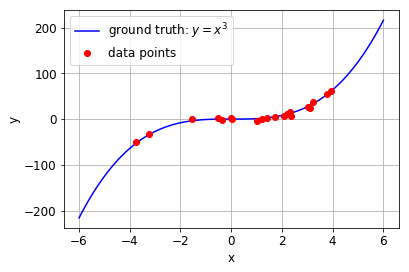

In [0]:
xx, yy = data_set(points=20, xrange=(-4, 4), std=3.) # generate data set of 20 samples
x = np.linspace(-6, 6, 100).reshape(100, 1)
y = x**3
plt.plot(x, y, 'b-', label='ground truth: $y=x^3$')
plt.plot(xx.numpy(),yy.numpy(),'or', label='data points')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

### Training a MLP with MSE

In [0]:
mlp = MLP(hidden_layers=[100], activation='relu') # standard MLP
mlp_optimizer = torch.optim.Adam(params=mlp.parameters(), lr=learning_rate)
mlp_criterion = nn.MSELoss()

In [0]:
for epoch in range(epochs):
    mlp_optimizer.zero_grad()
    mlp_loss = mlp_criterion(yy, mlp(xx))
    if epoch == 0:
        print('initial loss: ',mlp_loss.item())
    mlp_loss.backward()
    mlp_optimizer.step()
print('final loss: ',mlp_loss.item())

initial loss:  690.7272338867188
final loss:  5.526484489440918


#### Plot: Output of the MLP

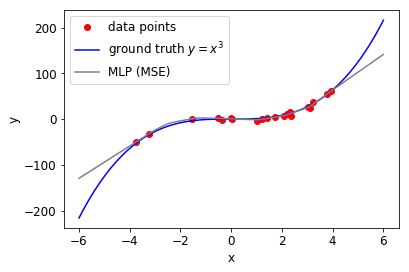

In [0]:
plt.plot(xx.numpy(),yy.numpy(),'or', label='data points')
plt.plot(x, y, 'b', label='ground truth $y=x^3$')
plt.plot(x, mlp(torch.tensor(x).float()).detach().numpy(), label='MLP (MSE)', color='grey')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

### Training an ensemble of 5 MLPs with MSE

In [0]:
mlps = []
mlp_optimizers = []
mlp_criterion = nn.MSELoss()
M = 5
for _ in range(M):
    net = MLP(hidden_layers=[100], activation='relu') # standard MLP
    mlps.append(net)
    mlp_optimizers.append(torch.optim.Adam(params=net.parameters(), lr=learning_rate))
# train 
for i, net in enumerate(mlps):
    print('Training network ',i+1)
    for epoch in range(epochs):
        mlp_optimizers[i].zero_grad()
        mlp_loss = mlp_criterion(yy, net(xx))
        if epoch == 0:
            print('initial loss: ',mlp_loss.item())
        mlp_loss.backward()
        mlp_optimizers[i].step()
    print('final loss: ',mlp_loss.item())

Training network  1
initial loss:  660.9290771484375
final loss:  5.631589412689209
Training network  2
initial loss:  681.4599609375
final loss:  5.670877933502197
Training network  3
initial loss:  671.44482421875
final loss:  5.62657356262207
Training network  4
initial loss:  710.5513916015625
final loss:  5.502882480621338
Training network  5
initial loss:  669.8631591796875
final loss:  5.5671586990356445


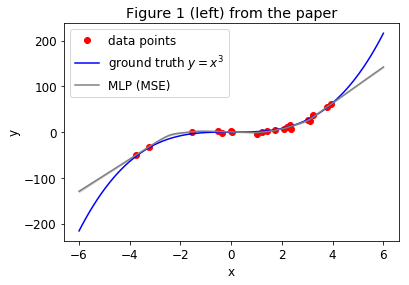

In [0]:
plt.plot(xx.numpy(),yy.numpy(),'or', label='data points')
plt.plot(x, y, 'b', label='ground truth $y=x^3$')
ys = []
for net in mlps:
    ys.append(net(torch.tensor(x).float()).detach().numpy())
ys = np.array(ys)
mean = np.mean(ys, axis=0)
std = np.std(ys, axis=0)
plt.plot(x, mean, label='MLP (MSE)', color='grey')
plt.fill_between(x.reshape(100,), (mean-std).reshape(100,), (mean+std).reshape(100,),color='grey',alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Figure 1 (left) from the paper')
plt.legend()

Subfigure from the paper:<div style="width: 400px;">![fig1_1.png](attachment:fig1_1.png)</div>

### Training a gaussian MLP with NLL

In [0]:
gmlp = GaussianMLP(hidden_layers=[100]) 
gmlp_optimizer = torch.optim.Adam(params=gmlp.parameters(), lr=learning_rate)

In [0]:
for epoch in range(epochs*3):
    gmlp_optimizer.zero_grad()
    mean, var = gmlp(xx)
    gmlp_loss = NLLloss(yy, mean, var) #NLL loss
    #gmlp_loss = (yy - mean).pow(2).mean() # MSE loss for testing
    if epoch == 0:
        print('initial loss: ',gmlp_loss.item())
    gmlp_loss.backward()
    gmlp_optimizer.step()
print('final loss: ',gmlp_loss.item())

initial loss:  16616.00390625
final loss:  60.37577819824219


#### Plot: Output of the gaussian MLP

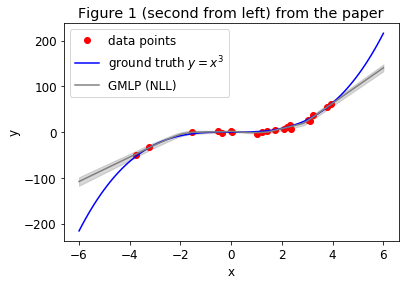

In [0]:
plt.plot(xx.numpy(),yy.numpy(),'or', label='data points')
plt.plot(x, y, 'b', label='ground truth $y=x^3$')
mean, var = gmlp(torch.tensor(x).float())
mean = mean.detach().numpy()
var = var.detach().numpy()
std = np.sqrt(var)
plt.plot(x, mean, 'grey', label='GMLP (NLL)')
plt.fill_between(x.reshape(100,), (mean-std).reshape(100,), (mean+std).reshape(100,),color='grey',alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Figure 1 (second from left) from the paper')
plt.legend()

Subfigure from the paper: <div style="width: 400px;">![fig1_2.png](attachment:fig1_2.png)</div>

### Training a gaussian mixture MLP (deep ensemble) with NLL

In [0]:
def train_model_step(model, optimizer, x, y):
    """ Training an individual gaussian MLP of the deep ensemble. """
    optimizer.zero_grad()
    mean, var = model(x)
    loss = NLLloss(y, mean, var)
    loss.backward()
    optimizer.step()
    return loss.item()

In [0]:
def train_gmm_step(gmm, optimizers, x, y):
    """ Training the whole ensemble. """
    losses = []
    for i in range(gmm.num_models):
        model = getattr(gmm, 'model_' + str(i))
        loss = train_model_step(model, optimizers[i], x, y)
        losses.append(loss)
    return losses

In [0]:
gmm = GaussianMixtureMLP(num_models=5, hidden_layers=[100])
gmm_optimizers = []
for i in range(gmm.num_models):
    model = getattr(gmm, 'model_' + str(i))
    gmm_optimizers.append(torch.optim.Adam(params=model.parameters(), lr=learning_rate, weight_decay=4e-5))

In [0]:
for epoch in range(epochs):
    losses = train_gmm_step(gmm, gmm_optimizers, xx, yy)
    if epoch == 0:
        print('inital losses: ', losses)
print('final losses: ', losses)

inital losses:  [11848.2578125, 34742.8828125, 13145.6865234375, 17781.7265625, 14152.146484375]
final losses:  [77.94450378417969, 95.23509216308594, 73.08729553222656, 62.187217712402344, 96.33274841308594]


#### Plot: Output of the ensemble model's individual sub models

Text(0, 0.5, 'y')

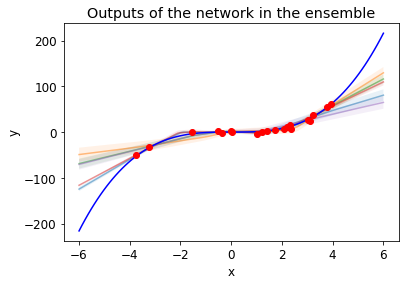

In [0]:
means = []
variances = []
for i in range(gmm.num_models):
    model = getattr(gmm, 'model_'+str(i))
    mean, var = model(torch.tensor(x).float())
    mean = mean.detach().numpy()
    var = var.detach().numpy()
    means.append(mean)
    variances.append(var)
    std = np.sqrt(var)
    plt.plot(x, mean, label='GMM (NLL) '+str(i+1),alpha=0.5)
    plt.fill_between(x.reshape(100,), (mean-std).reshape(100,), (mean+std).reshape(100,),alpha=0.1)
plt.plot(x, y, label='ground truth $y=x^3$', color='b')
plt.plot(xx.numpy(),yy.numpy(),'or', label='data points')
plt.title('Outputs of the network in the ensemble')
plt.xlabel('x')
plt.ylabel('y')

#### Plot: Output of the ensemble model

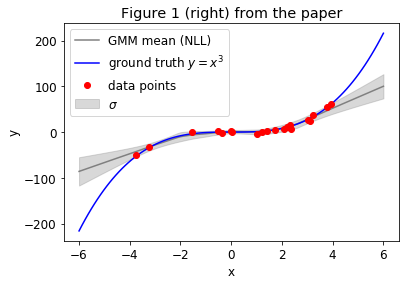

In [0]:
mean, var = gmm(torch.tensor(x).float())
mean = mean.detach().numpy()
var = var.detach().numpy()
std = np.sqrt(var)
#plt.fill_between(x.reshape(100,), (mean-var).reshape(100,), (mean+var).reshape(100,),color='red',alpha=0.1, label='$\sigma^2$')
plt.fill_between(x.reshape(100,), (mean-std).reshape(100,), (mean+std).reshape(100,), color='grey',alpha=0.3, label='$\sigma$')
plt.plot(x, mean, label='GMM mean (NLL)',color='grey')
plt.plot(x, y, 'b', label='ground truth $y=x^3$')
plt.plot(xx.numpy(),yy.numpy(),'or', label='data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Figure 1 (right) from the paper')
plt.legend()

Subfigure form the paper:<div style="width: 400px;">![fig1_4.png](attachment:fig1_4.png)<div/>

# Questions

1) Is something wrong with the training procedure in terms of batchsize, epochs? In the paper, it was mentioned, that a batchsize of 100 was used, but the toy example has only 20 samples. Training on these 20 samples for 40 epochs leads to underfitting for the NLL loss.

2) Is something wrong with the NLL loss function?

3) Is something wrong with the standard initialization in PyTorch? From Figure 1 (right) in the paper, I argue that each network of the ensemble has a more varying output outside the interval [-4, 4], than it is the case in my reproduction. I can't reproduce the predictive uncertainty as seen in the figure above.